In [13]:
import nbimporter
import task_2
from task_2 import plot_3d, grad_descent
from matplotlib import pyplot as plt, cm
import numpy as np

plt.rcParams['figure.figsize'] = [12, 12]
plt.rcParams['figure.dpi'] = 100

In [14]:
def plot_contour(fun, x, y, cnt=10, ax=None):
    # x = np.arange(-pi, 0, 0.1)
    # y = np.arange(-pi/2, pi/2, 0.1)
    xmin, xmax = x
    ymin, ymax = y

    x = np.arange(xmin, xmax, 0.1)
    y = np.arange(ymin, ymax, 0.1)
    x, y = np.meshgrid(x, y)
    z = fun([x, y])
    if ax is None:
        plt.contour(x, y, z, cnt)
    else:
        ax.contour(x, y, z, cnt)


def plot_3d_and_contour_with_trajectory(f, df, x, y, start, label, contours=20):
    fig = plt.figure(figsize=(24, 12))
    ax1 = fig.add_subplot(1, 2, 1, projection='3d') #plt.subplots(subplot_kw={"projection": "3d"})
    plot_3d(ax1, f, x, y, alpha=1)
    # plt.show()

    ax2 = fig.add_subplot(1, 2, 2)
    plot_contour(f, x, y, cnt=contours, ax=ax2)

    points = grad_descent(f, df, start)
    ax2.plot(points[:, 0], points[:, 1])
    ax2.scatter(points[:, 0], points[:, 1])
    ax2.set_title("Iterations: {}".format(len(points)), fontsize=24)

    fig.suptitle(label, fontsize=24)
    plt.show()

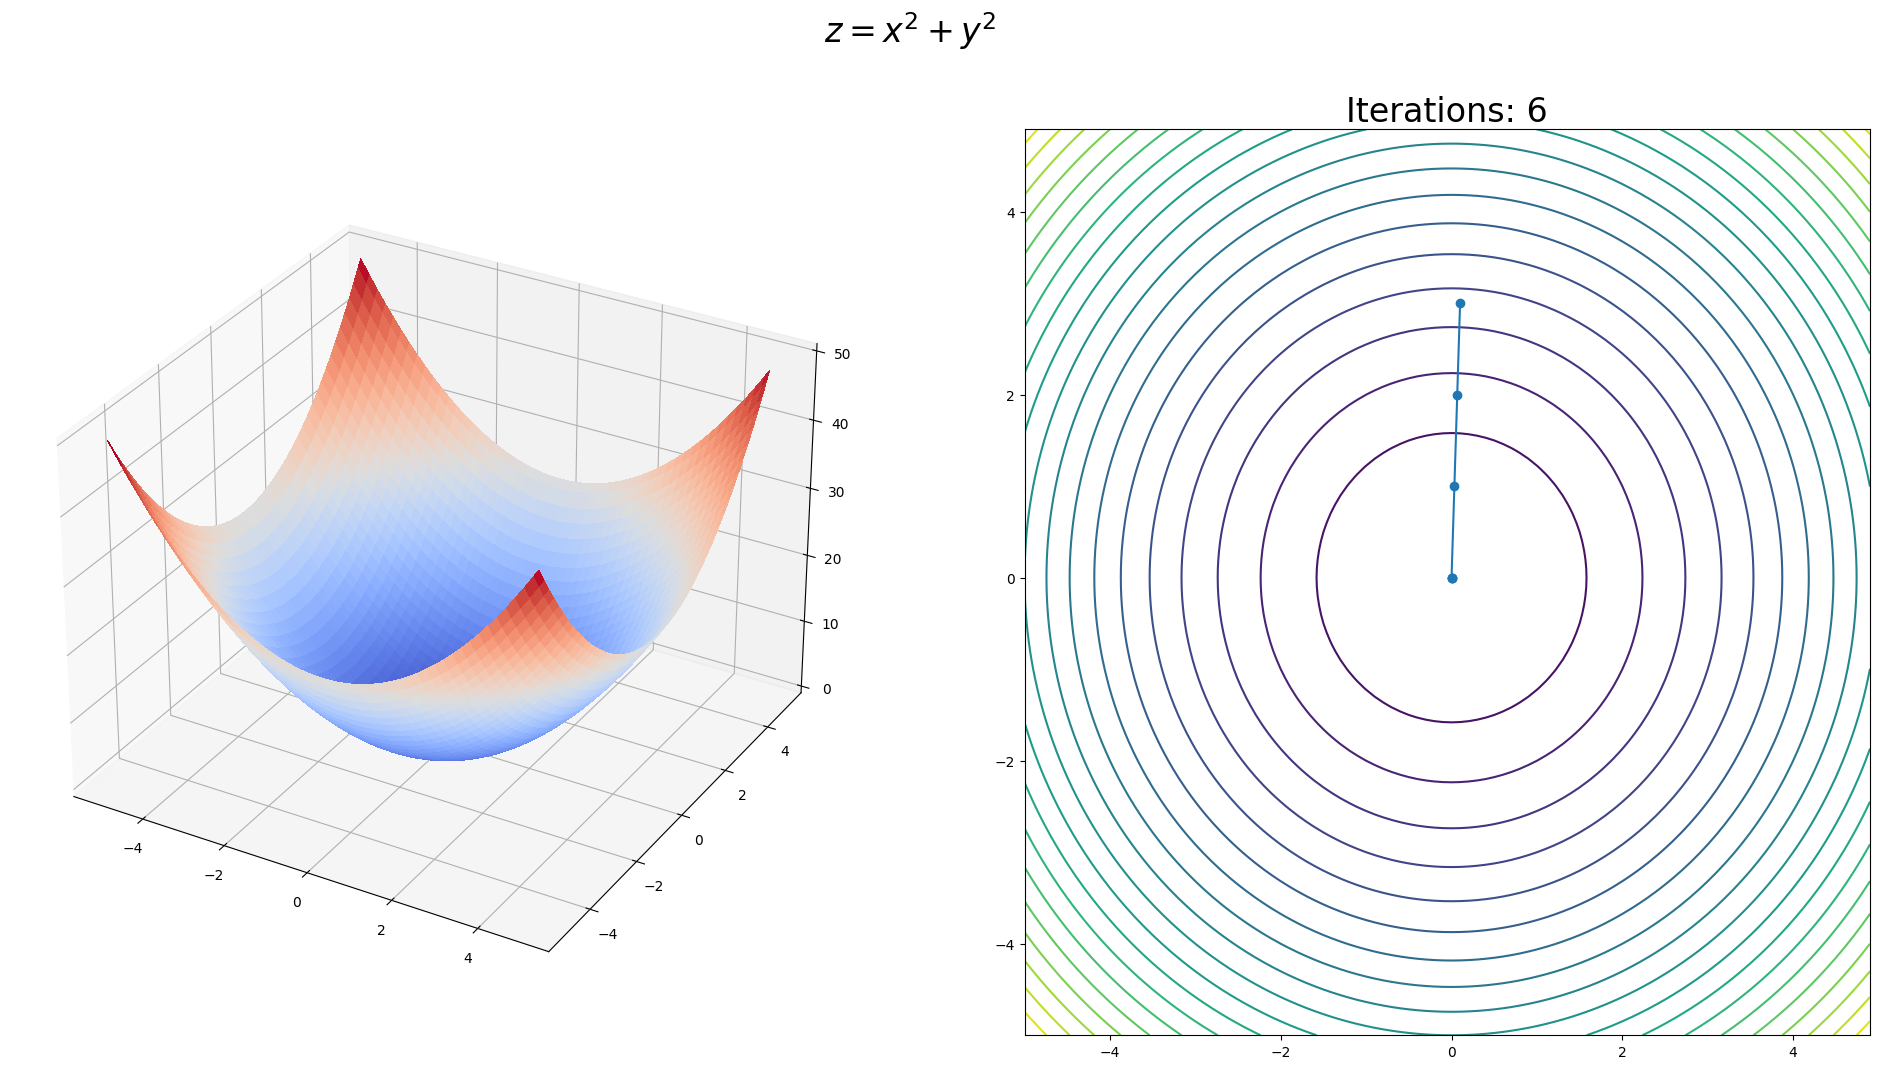

In [15]:
def f(xy):
    x, y = xy
    return x**2 + y**2

def df(xy):
    x, y = xy
    return np.array([2*x, 2*y])

plot_3d_and_contour_with_trajectory(
    f, df,
    [-5, 5], [-5, 5],
    [0.1, 3],
    '$z = x^2 + y^2$'
)

# Зависимость от числа обусловленности

Рассмотрим функцию $f(x, y) = c \cdot x^2 + y^2$ в точке $(0.1, 3)$  
Число обусловленности:  
$
f''(x, y) =
\begin{bmatrix}
2c & 0\\
0 & 2
\end{bmatrix}
; L = 2c; \Lambda = 2$  
$\mu = \dfrac{L}{\Lambda} = c$

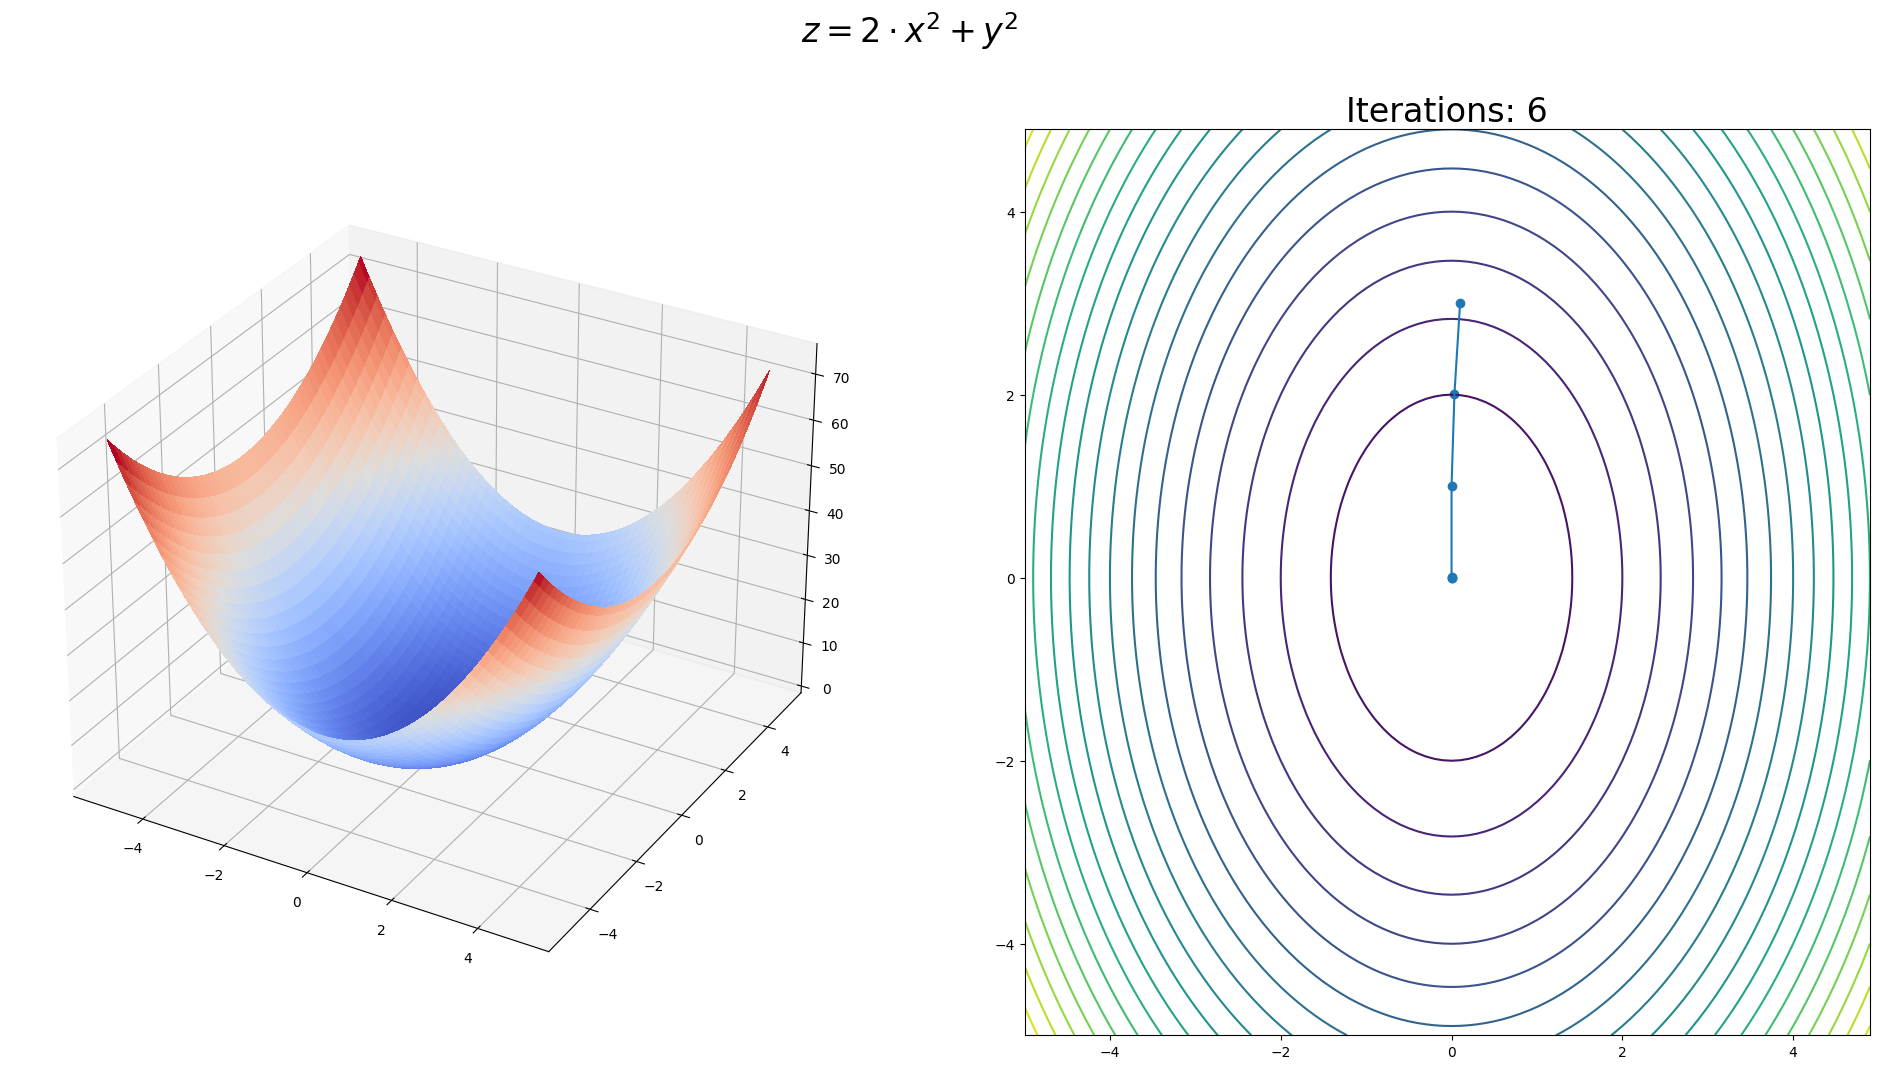

In [16]:
def f_mul(const):
    def tmp(xy):
        x, y = xy
        return const * x**2 + y**2

    return tmp

def df_mul(const):
    def tmp(xy):
        x, y = xy
        return np.array([2 * const * x, 2 * y])

    return tmp

def condition_number(const):
    return const

multiplier = 2
plot_3d_and_contour_with_trajectory(
    f_mul(multiplier), df_mul(multiplier),
    [-5, 5], [-5, 5],
    [0.1, 3],
    '$z = {} \cdot x^2 + y^2$'.format(multiplier)
)

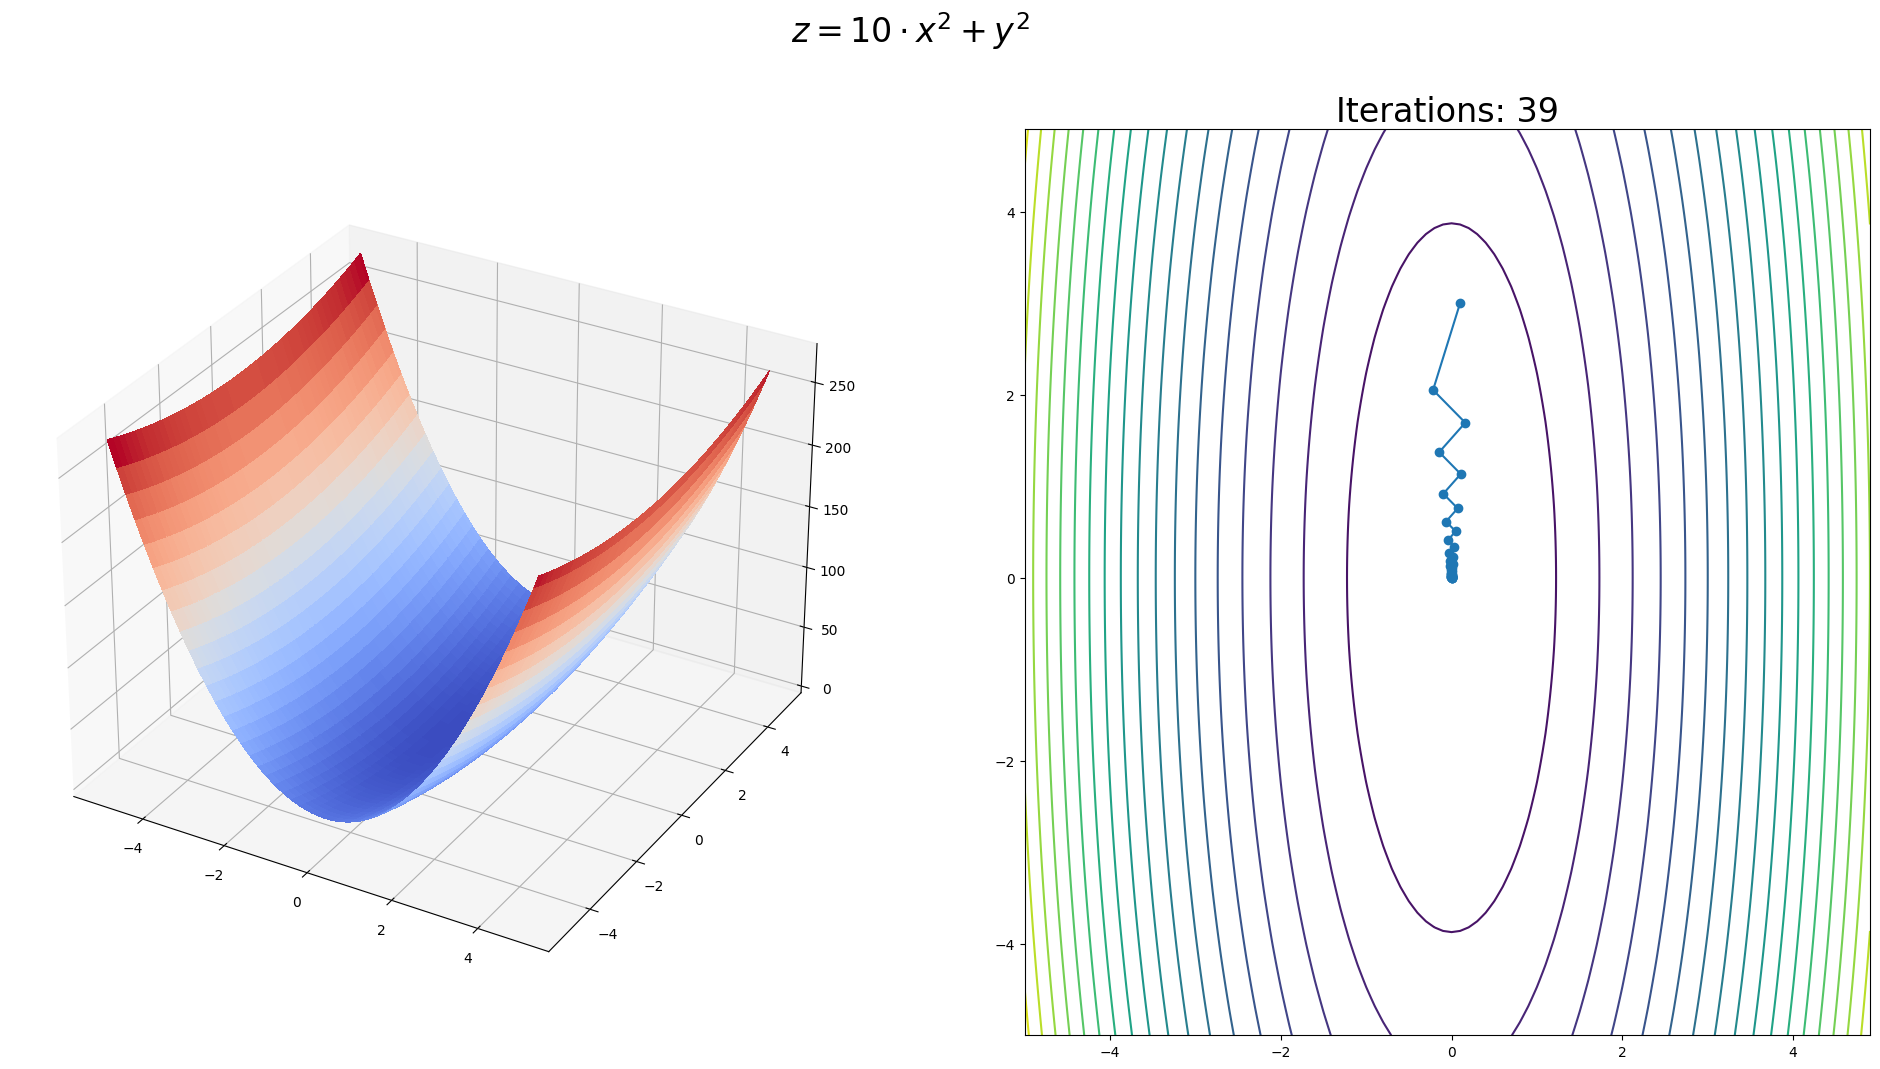

In [17]:
multiplier = 10
plot_3d_and_contour_with_trajectory(
    f_mul(multiplier), df_mul(multiplier),
    [-5, 5], [-5, 5],
    [0.1, 3],
    '$z = {} \cdot x^2 + y^2$'.format(multiplier) # TODO: format
)

## Как отличается поведение метода в зависимости от числа обусловленности функции, выбора начальной точки и стратегии выбора шага?
Отличается

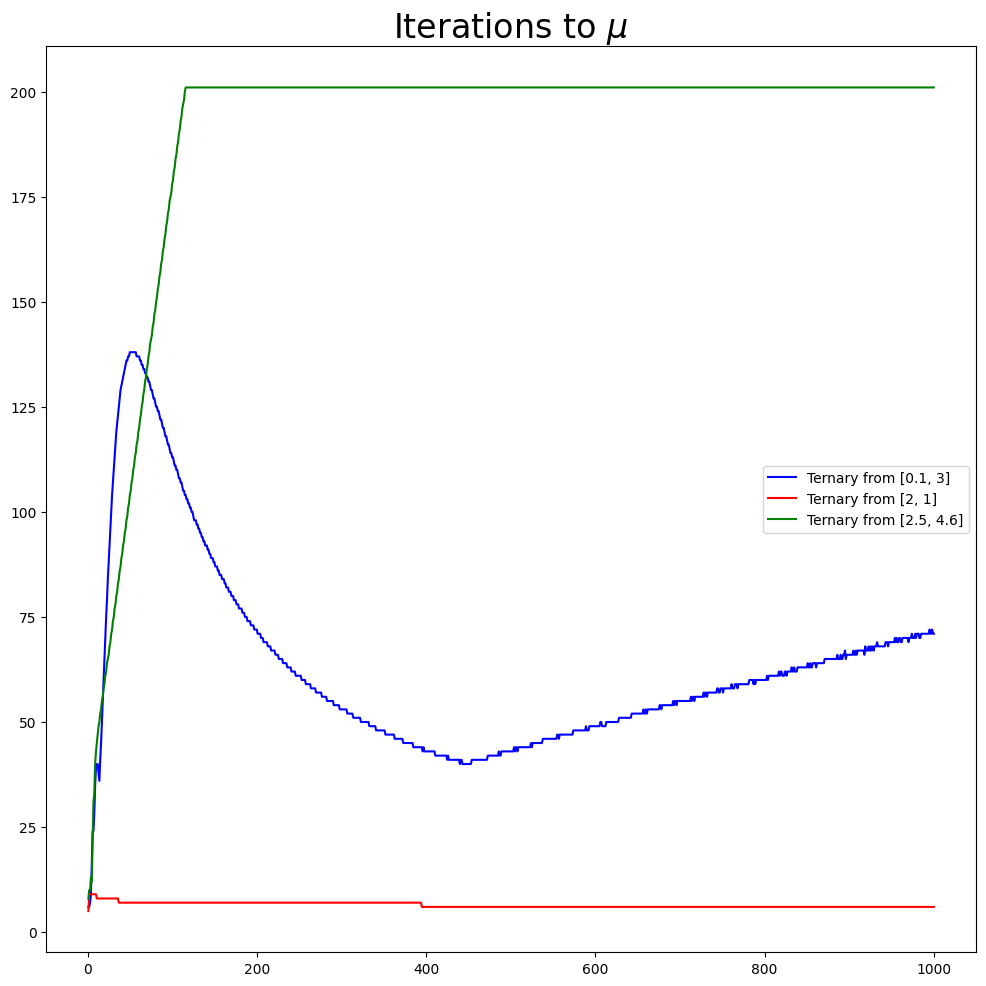

In [18]:
def plot_iters(cnt, start, method, label, c):
    iters = []
    for multiplier in range(cnt):
        points = grad_descent(
            f_mul(multiplier + 1), df_mul(multiplier + 1),
            start, max_iters=200, step_searcher=method
        )
        iters.append((len(points), condition_number(multiplier + 1)))

    iters = np.array(iters)
    plt.plot(iters[:, 1], iters[:, 0], label=label, c=c)

plt.title("Iterations to $\mu$", fontsize=24)
plot_iters(1000, [0.1, 3], task_2.ternary_searcher, "Ternary from [0.1, 3]", 'b')
plot_iters(1000, [2, 1], task_2.ternary_searcher, "Ternary from [2, 1]", 'r')
plot_iters(1000, [2.5, 4.6], task_2.ternary_searcher, "Ternary from [2.5, 4.6]", 'g')

plt.legend()
plt.show()